In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from arch import arch_model
import yfinance as yf
from datetime import datetime


In [2]:
# Load the data
nifty_data = pd.read_csv('/home/shubham/Desktop/NIFTY-Share-Market-Price-Prediction/data/NIFTY 50.csv')

# Convert Date column to datetime
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data.set_index('Date', inplace=True)

# Display the first few rows
nifty_data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-09,11531.599609,11582.549805,11461.000000,11555.900391,11555.900391,442500.0
2019-07-10,11536.150391,11593.700195,11475.650391,11498.900391,11498.900391,337600.0
2019-07-11,11561.450195,11599.000000,11519.500000,11582.900391,11582.900391,317300.0
2019-07-12,11601.150391,11639.549805,11538.599609,11552.500000,11552.500000,359400.0
2019-07-15,11614.750000,11618.400391,11532.299805,11588.349609,11588.349609,368800.0


In [3]:
# Get the structure of the dataset
nifty_data.info()

# Summary statistics
nifty_data.describe()

# Check for missing values
nifty_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2019-07-09 to 2024-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   float64
dtypes: float64(6)
memory usage: 67.6 KB


Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [4]:
# Descriptive statistics for numerical columns
nifty_stats = nifty_data[['Open', 'Close', 'High', 'Low']].describe()
print(nifty_stats)


               Open         Close          High           Low
count   1234.000000   1234.000000   1234.000000   1234.000000
mean   16100.791367  16090.827679  16178.879693  15994.805860
std     3750.439210   3752.938699   3751.455423   3749.614315
min     7735.149902   7610.250000   8036.950195   7511.100098
25%    12195.724854  12180.887207  12230.474854  12140.924805
50%    16994.125000  16973.750000  17110.074219  16838.549804
75%    18317.724609  18304.987793  18378.724610  18224.549805
max    24369.949219  24414.400391  24429.150391  24331.900391


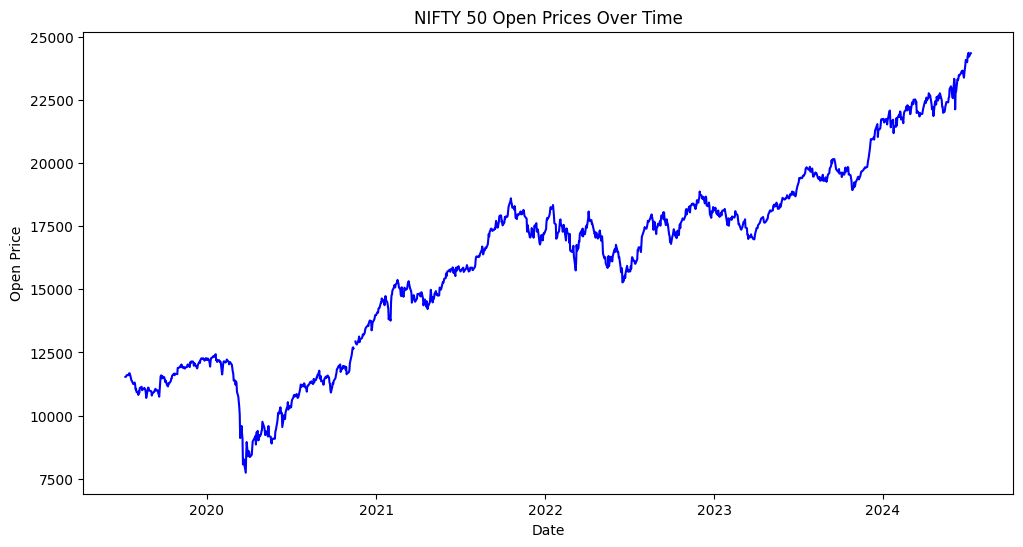

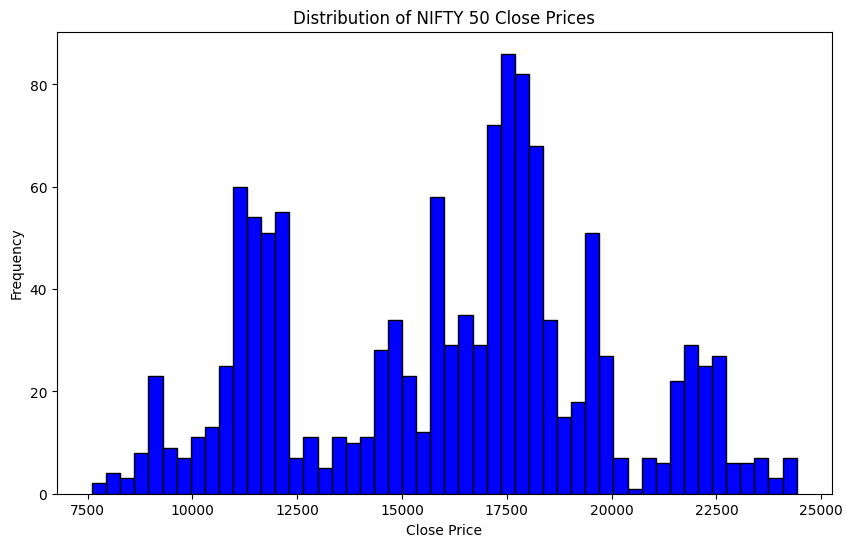

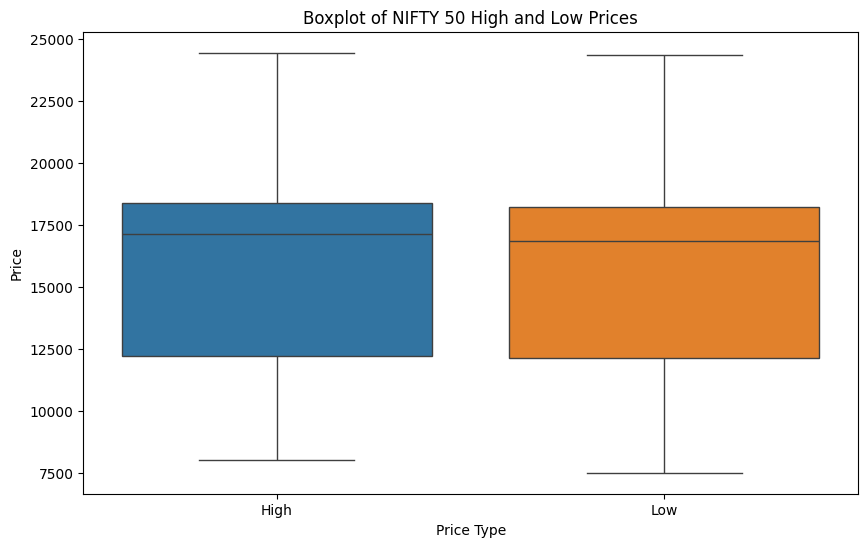

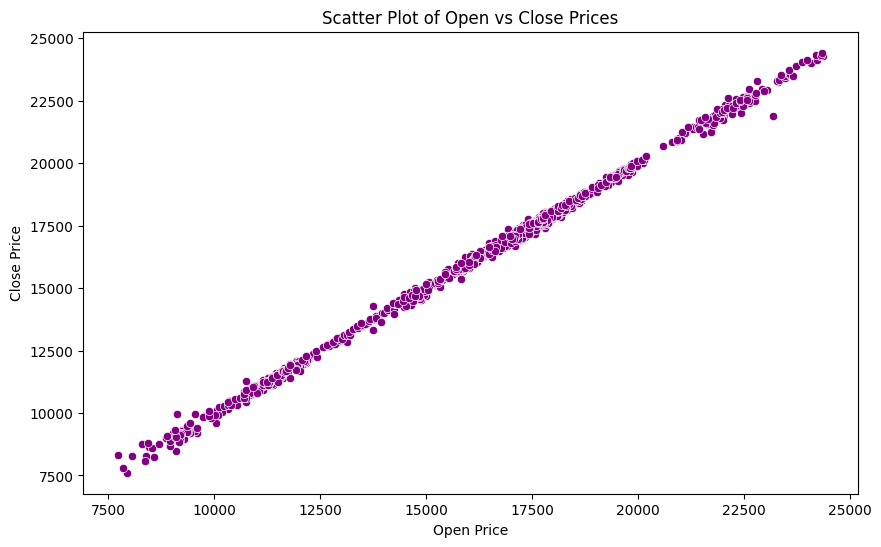

In [5]:
# Plot Open prices over time
plt.figure(figsize=(12, 6))
plt.plot(nifty_data.index, nifty_data['Open'], color='blue')
plt.title('NIFTY 50 Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

# Histogram of Close prices
plt.figure(figsize=(10, 6))
plt.hist(nifty_data['Close'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of NIFTY 50 Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of High and Low prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=nifty_data[['High', 'Low']])
plt.title('Boxplot of NIFTY 50 High and Low Prices')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

# Scatter plot of Open vs Close prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Close', data=nifty_data, color='purple')
plt.title('Scatter Plot of Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


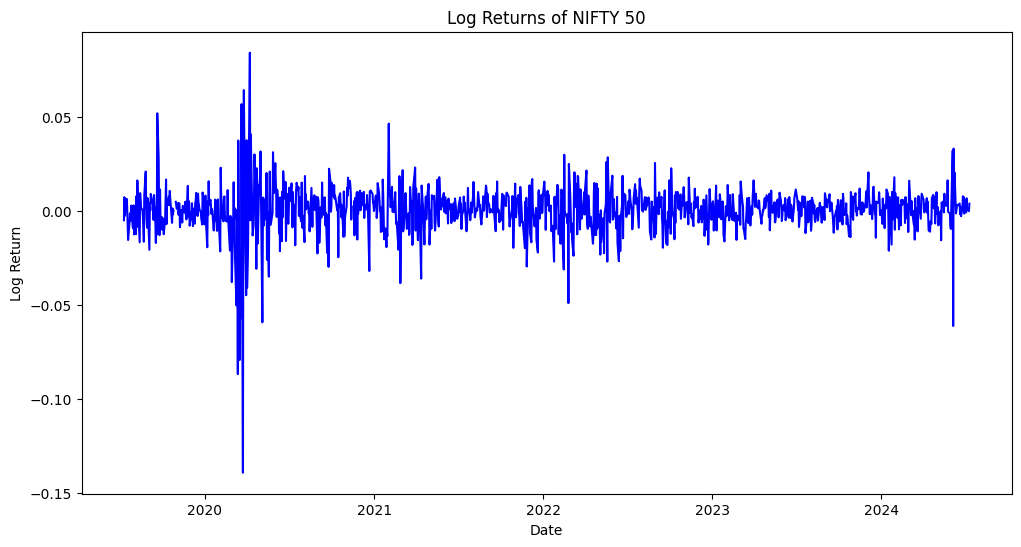

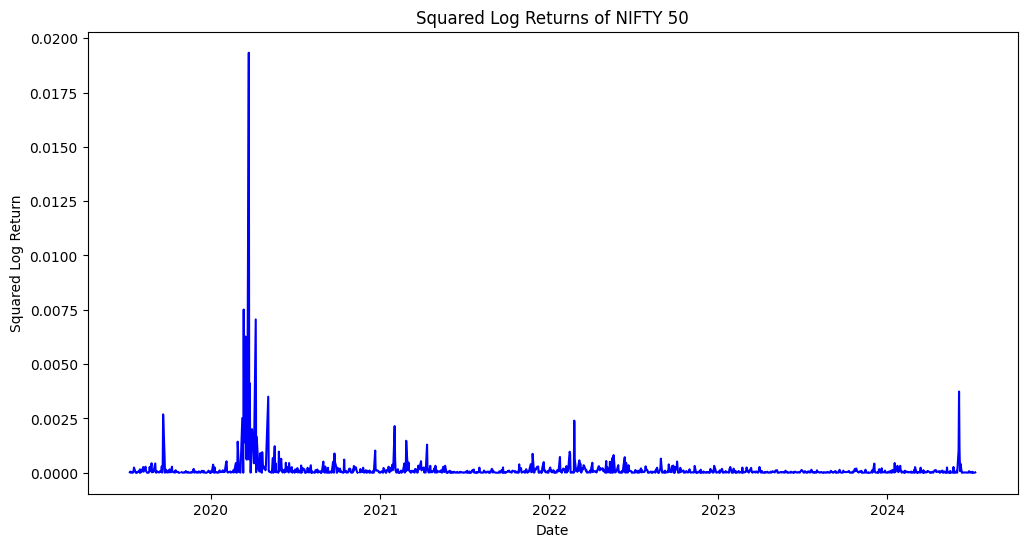

In [6]:
# Calculate log returns
nifty_data['Log_Return'] = np.log(nifty_data['Close'] / nifty_data['Close'].shift(1))
nifty_data['Squared_Log_Return'] = nifty_data['Log_Return'] ** 2

# Plot log returns
plt.figure(figsize=(12, 6))
plt.plot(nifty_data.index, nifty_data['Log_Return'], color='blue')
plt.title('Log Returns of NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

# Plot squared log returns
plt.figure(figsize=(12, 6))
plt.plot(nifty_data.index, nifty_data['Squared_Log_Return'], color='blue')
plt.title('Squared Log Returns of NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Squared Log Return')
plt.show()


In [7]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(nifty_data['Log_Return'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -10.262535414869696
p-value: 4.200053545619705e-18


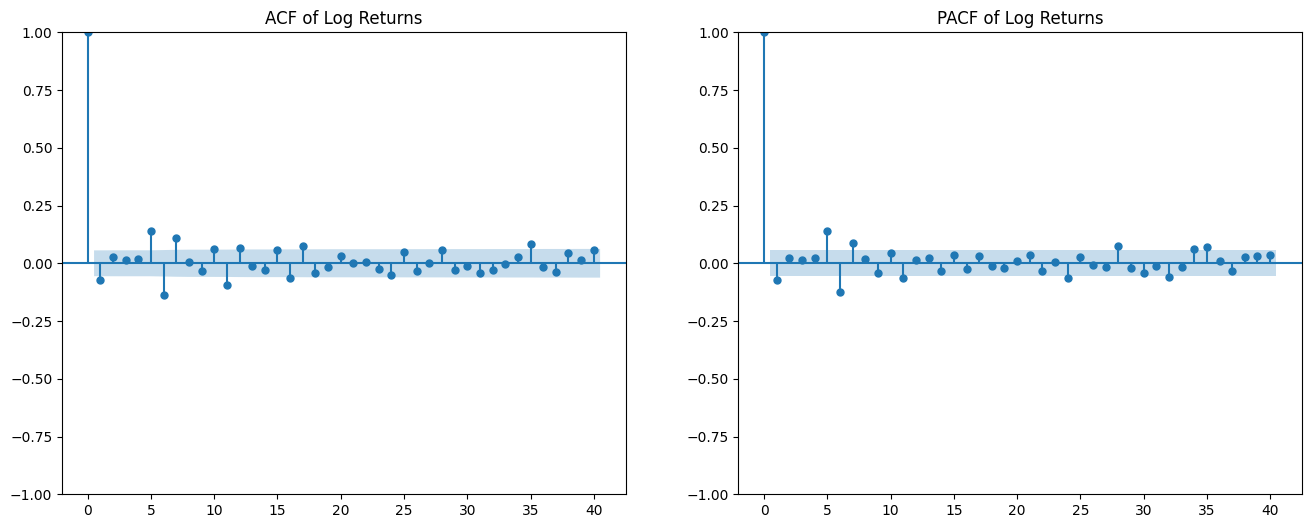

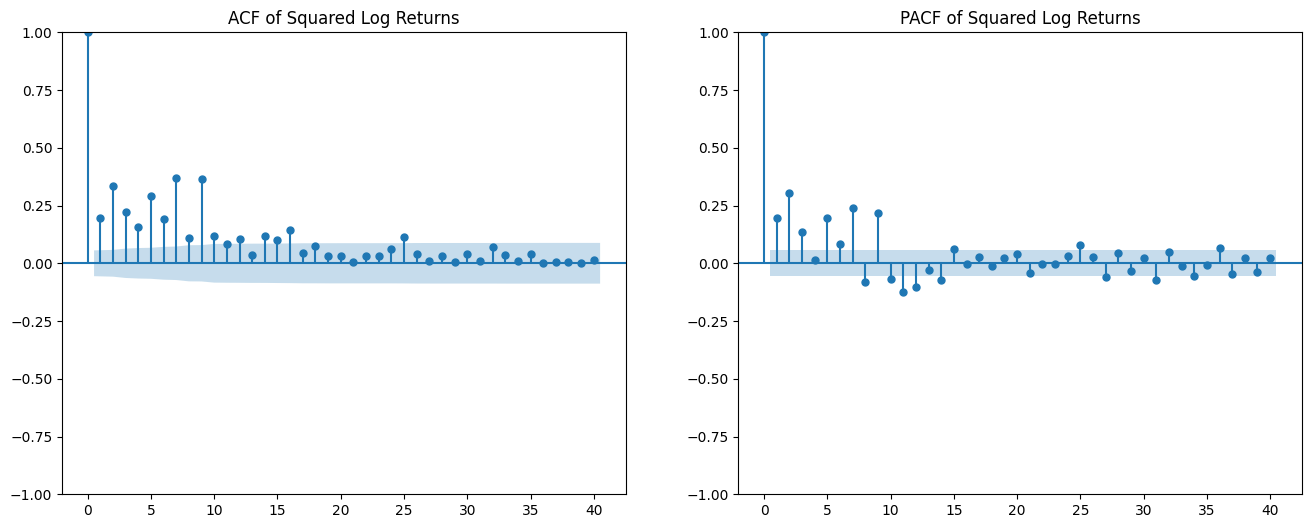

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF for log returns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(nifty_data['Log_Return'].dropna(), ax=axes[0], lags=40, title='ACF of Log Returns')
plot_pacf(nifty_data['Log_Return'].dropna(), ax=axes[1], lags=40, title='PACF of Log Returns')
plt.show()

# ACF and PACF for squared log returns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(nifty_data['Squared_Log_Return'].dropna(), ax=axes[0], lags=40, title='ACF of Squared Log Returns')
plot_pacf(nifty_data['Squared_Log_Return'].dropna(), ax=axes[1], lags=40, title='PACF of Squared Log Returns')
plt.show()


/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Log_Return   No. Observations:                 1231
Model:                 ARIMA(0, 0, 1)   Log Likelihood                3675.963
Date:                Tue, 09 Jul 2024   AIC                          -7345.926
Time:                        14:57:48   BIC                          -7330.580
Sample:                             0   HQIC                         -7340.153
                               - 1231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.683      0.092   -9.57e-05       0.001
ma.L1         -0.0727      0.016     -4.618      0.000      -0.104      -0.042
sigma2         0.0001   2.31e-06     64.584      0.0

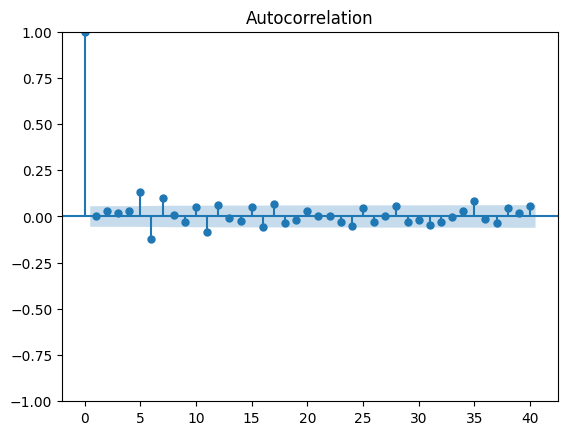

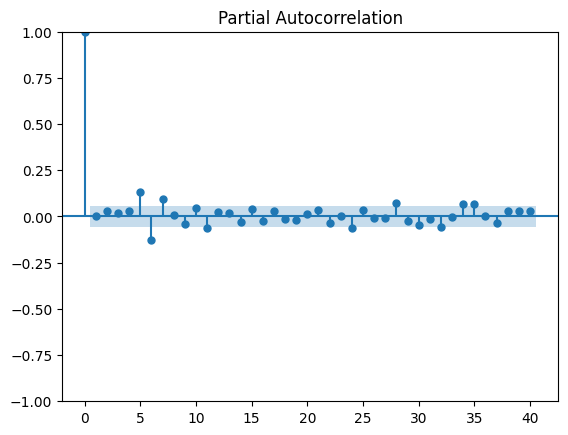

1231    0.000347
1232    0.000581
1233    0.000581
1234    0.000581
1235    0.000581
1236    0.000581
1237    0.000581
1238    0.000581
1239    0.000581
1240    0.000581
1241    0.000581
1242    0.000581
1243    0.000581
1244    0.000581
1245    0.000581
1246    0.000581
1247    0.000581
1248    0.000581
1249    0.000581
1250    0.000581
1251    0.000581
1252    0.000581
1253    0.000581
1254    0.000581
1255    0.000581
1256    0.000581
1257    0.000581
1258    0.000581
1259    0.000581
1260    0.000581
Name: predicted_mean, dtype: float64


/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(nifty_data['Log_Return'].dropna(), order=(0, 0, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# Check residuals
sm.graphics.tsa.plot_acf(arima_result.resid, lags=40)
sm.graphics.tsa.plot_pacf(arima_result.resid, lags=40)
plt.show()
# Forecast using ARIMA model
arima_forecast = arima_result.forecast(steps=30)
print(arima_forecast)

In [17]:
# Calculate RMSE for ARIMA model
from sklearn.metrics import mean_squared_error
arima_rmse = np.sqrt(mean_squared_error(nifty_data['Log_Return'][-30:], arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')

ARIMA RMSE: 0.015003400657317617


In [28]:
# Fit GARCH model (GARCH(1, 1) as an example)
nifty_data.dropna(inplace=True)
garch_model = arch_model(nifty_data['Log_Return'], vol='Garch', p=1, q=1)
garch_result = garch_model.fit()
print(garch_result.summary())

# Forecast using GARCH model
garch_forecast = garch_result.forecast(horizon=30, method='simulation')
simulated_paths = garch_forecast.simulations.values[-1,:,:]
garch_mean_forecast = simulated_paths.mean(axis=1)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 7012912953.51976
Iteration:      2,   Func. Count:     19,   Neg. LLF: 51403466817.070564
Iteration:      3,   Func. Count:     34,   Neg. LLF: 3.77779413079912e+17
Iteration:      4,   Func. Count:     49,   Neg. LLF: 1418396287095.5037
Iteration:      5,   Func. Count:     63,   Neg. LLF: -3974.771998625645
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3974.7720048979872
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3974.77
Distribution:                  Normal   AIC:                          -7941.54
Method:            Maximum Like

/home/shubham/.local/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00015. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [27]:
garch_forecast = garch_result.forecast(horizon=30, method='simulation')
garch_mean_forecast = garch_forecast.simulations.values[-1, :, :].mean(axis=1)

# Ensure the lengths match for RMSE calculation
observed_log_returns = nifty_data['Log_Return'][-30:]

# Calculate RMSE for ARIMA model
arima_rmse = np.sqrt(mean_squared_error(observed_log_returns, arima_forecast))
print(f'ARIMA RMSE: {arima_rmse}')

# Calculate RMSE for GARCH model
garch_rmse = np.sqrt(mean_squared_error(observed_log_returns, garch_mean_forecast[:30]))
print(f'GARCH RMSE: {garch_rmse}')

ARIMA RMSE: 0.015003400657317617
GARCH RMSE: 0.014775823200065222


[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_227614/127575605.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Adj Close': 'price'}, inplace=True)


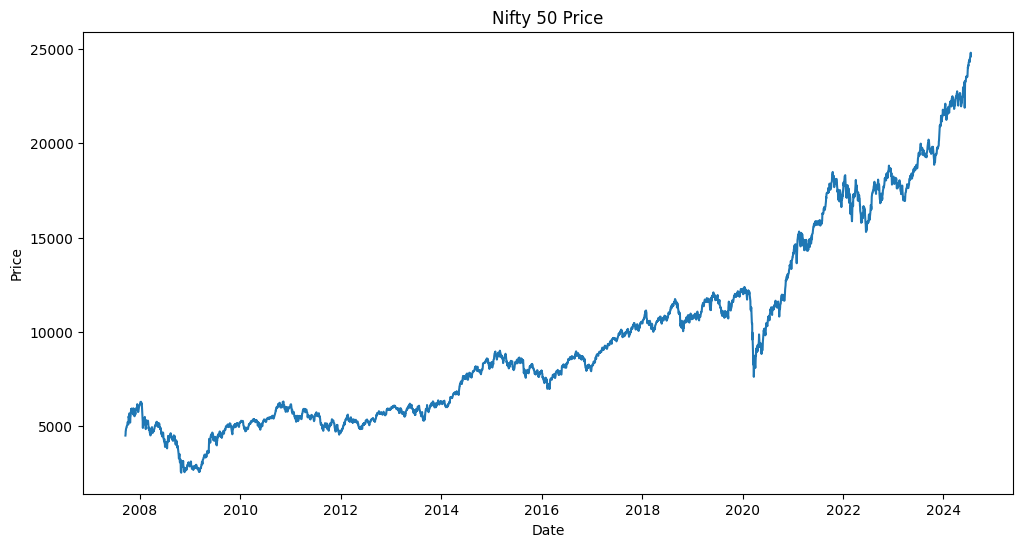

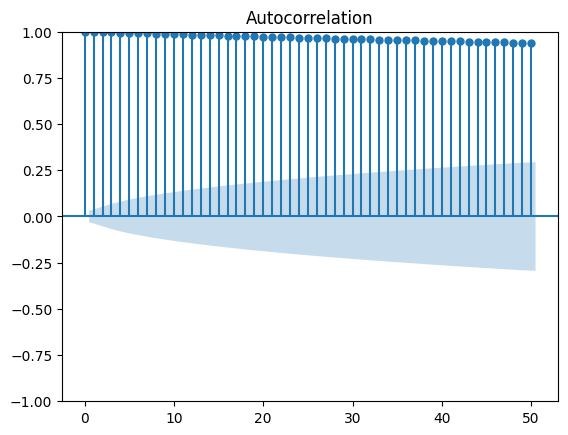

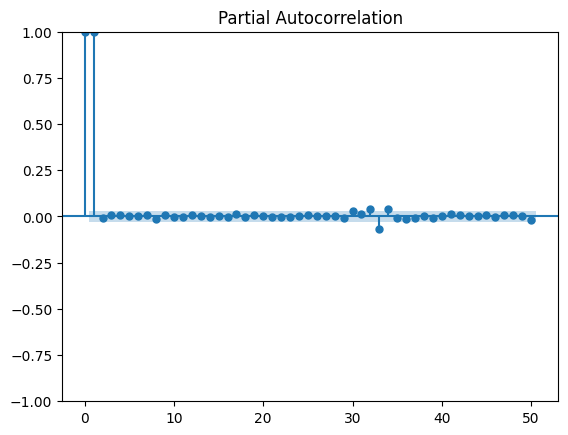

/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationar

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 4126
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -25274.694
Date:                Fri, 19 Jul 2024   AIC                          50571.388
Time:                        13:46:58   BIC                          50640.961
Sample:                             0   HQIC                         50596.012
                               - 4126                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5568      0.194     -2.874      0.004      -0.937      -0.177
ar.L2         -0.1025      0.239     -0.430      0.667      -0.570       0.365
ar.L3          0.5830      0.133      4.370      0.0

/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_227614/127575605.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ARIMA Forecast'] = model_arima_fit.predict(start=0, end=len(data)-1, dynamic=False)
/tmp/ipykernel_227614/127575605.py:46: SettingWithCopyWarning:

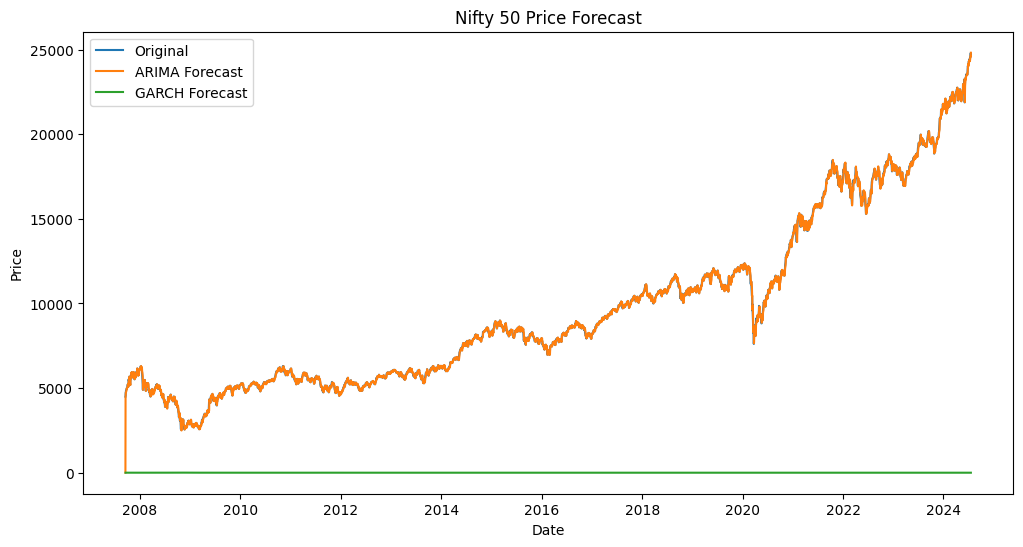

/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/shubham/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_227614/127575605.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ARIMA Long Forecast'] = forecast_arima_long


ValueError: Length of values (1) does not match length of index (4126)

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

# Step 1: Fetch the data from Yahoo Finance
ticker = '^NSEI'  # Nifty 50 ticker
data = yf.download(ticker, start='2000-01-01')

# Use the 'Adj Close' column for analysis
data = data[['Adj Close']]
data.rename(columns={'Adj Close': 'price'}, inplace=True)

# Step 2: Perform exploratory data analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(data['price'])
plt.title('Nifty 50 Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot ACF and PACF
plot_acf(data['price'], lags=50)
plot_pacf(data['price'], lags=50)
plt.show()

# Step 3: Fit the ARIMA model to the data
model_arima = ARIMA(data['price'], order=(5,1,5))  # You may need to tune the order
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

# Forecast with ARIMA
forecast_arima = model_arima_fit.forecast(steps=30)
data['ARIMA Forecast'] = model_arima_fit.predict(start=0, end=len(data)-1, dynamic=False)

# Step 4: Fit the GARCH model to the data
returns = data['price'].pct_change().dropna() * 100
model_garch = arch_model(returns, vol='Garch', p=1, q=1)
model_garch_fit = model_garch.fit()
print(model_garch_fit.summary())

# Forecast with GARCH
forecast_garch = model_garch_fit.forecast(horizon=30)
data['GARCH Forecast'] = model_garch_fit.conditional_volatility

# Step 5: Plot the forecasts against the original data
plt.figure(figsize=(12, 6))
plt.plot(data['price'], label='Original')
plt.plot(data['ARIMA Forecast'], label='ARIMA Forecast')
plt.plot(data['GARCH Forecast'], label='GARCH Forecast')
plt.title('Nifty 50 Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 6: Forecasting the long span using ARIMA and GARCH
steps = 365  # Change this to the desired number of forecast days

# ARIMA long forecast
forecast_arima_long = model_arima_fit.forecast(steps=steps)
data['ARIMA Long Forecast'] = forecast_arima_long

# GARCH long forecast
forecast_garch_long = model_garch_fit.forecast(horizon=steps)
data['GARCH Long Forecast'] = forecast_garch_long.variance.values[-steps:]

# Plot the long span forecasts
plt.figure(figsize=(12, 6))
plt.plot(data['price'], label='Original')
plt.plot(pd.Series(data['ARIMA Long Forecast'], index=data.index[-steps:]), label='ARIMA Long Forecast')
plt.plot(pd.Series(data['GARCH Long Forecast'], index=data.index[-steps:]), label='GARCH Long Forecast')
plt.title('Nifty 50 Long Span Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
